In [25]:
import pandas as pd,warnings,numpy as np,matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier as rfc
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
test_table, user_table = pd.read_csv("test_table.csv",header=0), pd.read_csv("user_table.csv",header=0)
user_table.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [27]:
test_table.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


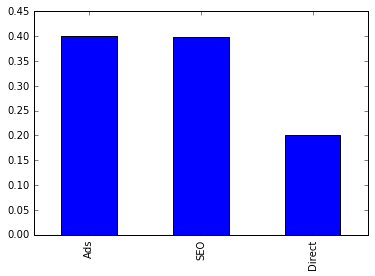

In [28]:
test_table.source.value_counts('conversion').plot(kind='bar')

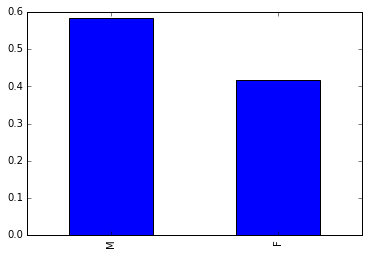

In [29]:
user_table.sex.value_counts('conversion').plot(kind='bar')

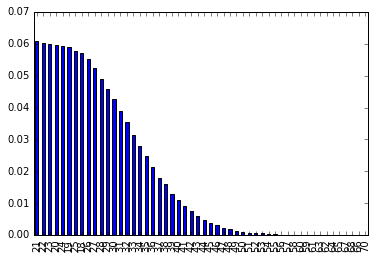

In [30]:
user_table.age.value_counts('conversion').plot(kind='bar')

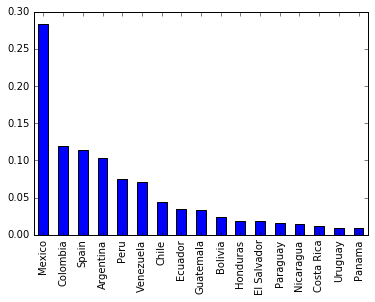

In [31]:
user_table.country.value_counts('conversion').plot(kind='bar')

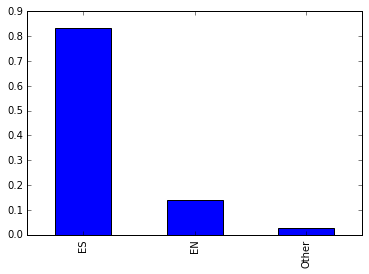

In [32]:
test_table.browser_language.value_counts('conversion').plot(kind='bar')

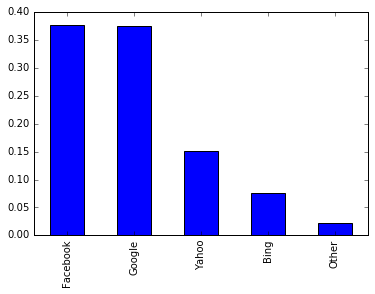

In [33]:
test_table.ads_channel.value_counts('conversion').plot(kind='bar')

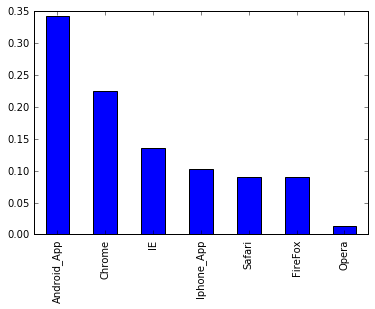

In [34]:
test_table.browser.value_counts('conversion').plot(kind='bar')

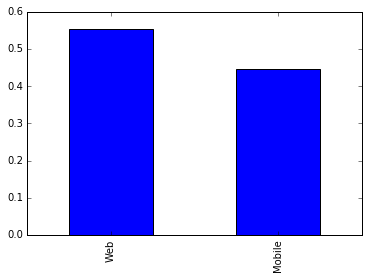

In [35]:
test_table.device.value_counts('conversion').plot(kind='bar')

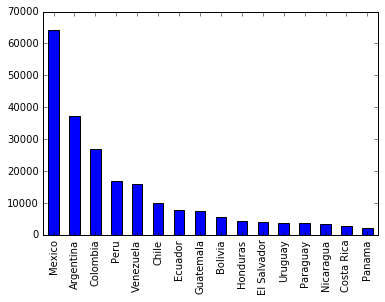

In [36]:
total_df = pd.merge(test_table,user_table,on="user_id")
total_df.sort_values(['date'])
test_sample = total_df[total_df.test==1]
control_sample = total_df[total_df.test==0]
test_sample.country.value_counts('user_id').apply(lambda x: x*len(test_sample.country)).plot(kind='bar')

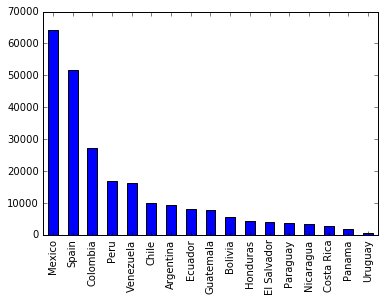

In [37]:
control_sample.country.value_counts('user_id').apply(lambda x: x*len(control_sample.country)).plot(kind='bar')

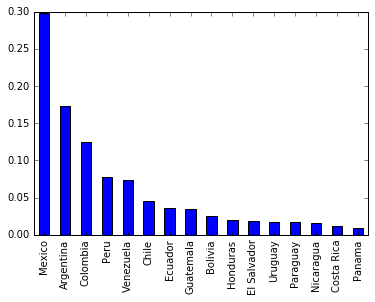

In [38]:
test_sample.country.value_counts('conversion').plot(kind='bar')

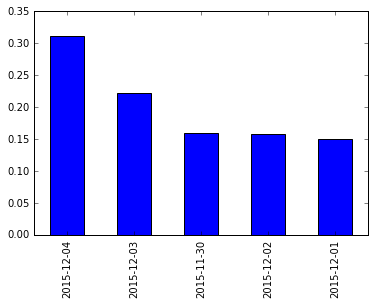

In [39]:
test_sample[test_sample.conversion==1].date.value_counts('conversion').plot(kind='bar')

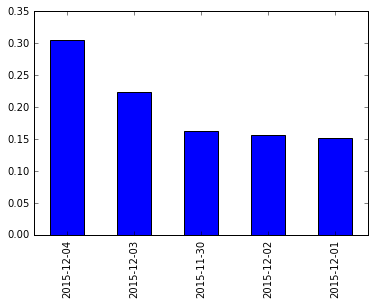

In [40]:
control_sample[control_sample.conversion==1].date.value_counts('conversion').plot(kind='bar')

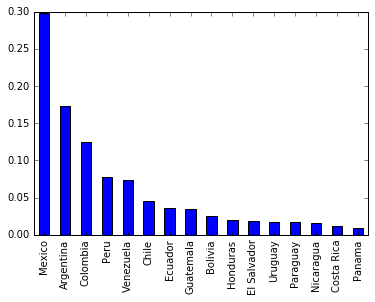

In [41]:
test_sample.country.value_counts('conversion').plot(kind='bar')

In [42]:
old = control_sample.groupby('country').mean().conversion.as_matrix()
new = test_sample.groupby('country').mean().conversion.as_matrix()
F,p = stats.f_oneway(old,new)

In [43]:
print "The F stat is: ",F
print "The p-value is: ",p

The F stat is:  0.207589014447
The p-value is:  0.651839218508


In [44]:
model_test,model_control = rfc(),rfc()
test_sample = control_sample[control_sample.country!='Spain']

In [45]:
test_sample.columns.values

array(['user_id', 'date', 'source', 'device', 'browser_language',
       'ads_channel', 'browser', 'conversion', 'test', 'sex', 'age',
       'country'], dtype=object)

In [46]:
values_of_interest = list(set(test_sample.columns.values)-set(['user_id','date','conversion','test','age']))
for val in values_of_interest:
    test_sample[val] = LabelEncoder().fit_transform(test_sample[val])
    control_sample[val] = LabelEncoder().fit_transform(control_sample[val])

In [47]:
predictive_values = list(set(total_df.columns.values) - set(['user_id','conversion','test','date']))
model_test.fit(test_sample[predictive_values],test_sample.conversion)
model_control.fit(control_sample[predictive_values],control_sample.conversion)
print "Test sample: ",model_test.score(test_sample[predictive_values],test_sample.conversion)
print "Control sample: ", model_control.score(control_sample[predictive_values],control_sample.conversion)

Test sample:  0.956349056451
Control sample:  0.949041093579


In [48]:
print predictive_values
print "Feature Importances for test: ", model_test.feature_importances_
print "Feature Importances for control: ",model_control.feature_importances_

['ads_channel', 'age', 'sex', 'source', 'country', 'device', 'browser_language', 'browser']
Feature Importances for test:  [ 0.1132904   0.25561482  0.08991026  0.07050275  0.23356259  0.03553678
  0.05693534  0.14464706]
Feature Importances for control:  [ 0.10021331  0.26055175  0.1046075   0.05490824  0.18104794  0.03894074
  0.09195826  0.16777226]
